## K-Nearest Neighbours (KNN)

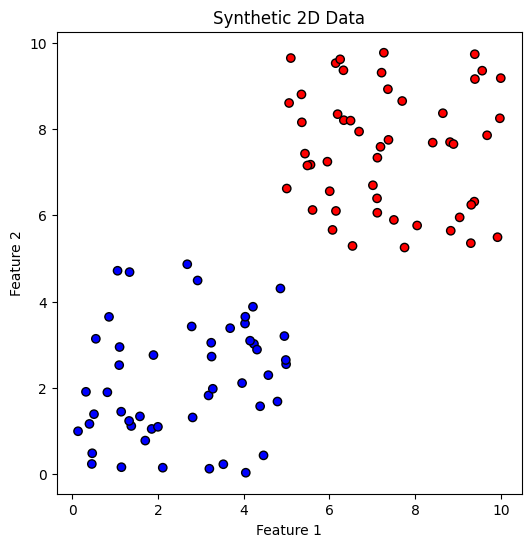

In [1]:
import random
import math
import matplotlib.pyplot as plt

random.seed(42)

cluster_0 = [(random.uniform(0, 5), random.uniform(0, 5)) for _ in range(50)]
cluster_1 = [(random.uniform(5, 10), random.uniform(5, 10)) for _ in range(50)]
X = cluster_0 + cluster_1
y = [0]*50 + [1]*50

plt.figure(figsize=(6, 6))
plt.scatter([pt[0] for pt in X], [pt[1] for pt in X], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Data')
plt.show()

In [3]:
data = list(zip(X, y))
random.shuffle(data)
split_idx = int(0.75 * len(data)) # 75/25 unlike linear & logistic
train_data = data[:split_idx]
test_data = data[split_idx:]

X_train, y_train = zip(*train_data)
X_test, y_test = zip(*test_data)

In [4]:
def euclidean_distance(point1, point2):

    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [5]:
class K_Nearest_Neighbours:
    def __init__(self, k=3):
        self.k = k
        self.X_train = []
        self.y_train = []

    def fit(self, X, y):
        self.X_train = list(X)
        self.y_train = list(y)

    def predict(self, X):
        predictions = []
        for pt in X:
            distances = [euclidean_distance(pt, train_pt) for train_pt in self.X_train]
            dist_labels = list(zip(distances, self.y_train))
            dist_labels.sort(key=lambda x: x[0])
            k_nearest = dist_labels[:self.k]
            votes = {}
            for _, label in k_nearest:
                votes[label] = votes.get(label, 0) + 1
            
            pred = max(votes.items(), key=lambda x: x[1])[0]
            predictions.append(pred)
        return predictions

In [6]:
knn = K_Nearest_Neighbours(k=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [7]:
correct_predictions = 0
for true_label, predicted_label in zip(y_test, y_pred):
    if true_label == predicted_label:
        correct_predictions += 1

accuracy = correct_predictions / len(y_test)
print(f"Test Accuracy: {accuracy:.2%}")

Test Accuracy: 100.00%


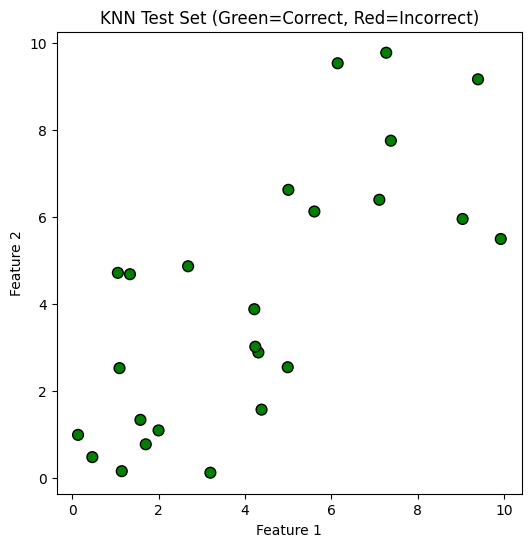

In [8]:
plt.figure(figsize=(6, 6))

colors = ['green' if true == pred else 'red' for true, pred in zip(y_test, y_pred)]
pts = list(X_test)
plt.scatter([pt[0] for pt in pts], [pt[1] for pt in pts], c=colors, edgecolors='k', s=60)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Test Set (Green=Correct, Red=Incorrect)')
plt.show()

### What we have understood:

`K_Nearest_Neighbours()` is a lazy, instance-based classifier that makes predictions by looking at its K nearest neighbours in the training set.

- It stores all training points (fit just saves `X_train` and `y_train`).
- To predict a new point:
  1. Compute the Euclidean distance to each training point.
  2. Sort by distance and pick the closest K points.
  3. *Vote*: the most frequent label among those *k* becomes the prediction.
- No model parameters are learned beforehand—everything happens at prediction time.
- Key hyperparameter:  
  - *k* – how many neighbors to consider (for example 3, 5, 7).

By the way, it is all right to get 100% accuracy score. Although it is rare, we strangely obtained this score more than 4 times.